# Market_Positioning_of_Mobile

# Multi-Variate Model:

# Decision Tree Model:

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 4)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [47]:
y_hat_train_dtree = dtree.predict(x_train)
y_hat_test_dtree = dtree.predict(x_test)

In [48]:
def model_eval(actual, predict):
    conf_matrix = confusion_matrix(actual, predict)
    class_rep = classification_report(actual, predict)
    acc_score = accuracy_score(actual, predict)
    print('The Accuracy of the model is: ', round(acc_score, 2))
    print(conf_matrix)
    print(class_rep)

In [49]:
model_eval(y_train, y_hat_train_dtree)

The Accuracy of the model is:  0.83
[[389  24   0   0]
 [ 39 349  12   0]
 [  0 118 214  52]
 [  0   1  28 374]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       413
           1       0.71      0.87      0.78       400
           2       0.84      0.56      0.67       384
           3       0.88      0.93      0.90       403

    accuracy                           0.83      1600
   macro avg       0.83      0.82      0.82      1600
weighted avg       0.84      0.83      0.82      1600



In [50]:
model_eval(y_test, y_hat_test_dtree)

The Accuracy of the model is:  0.77
[[79  8  0  0]
 [15 78  7  0]
 [ 0 37 61 18]
 [ 0  0  8 89]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        87
           1       0.63      0.78      0.70       100
           2       0.80      0.53      0.64       116
           3       0.83      0.92      0.87        97

    accuracy                           0.77       400
   macro avg       0.78      0.78      0.77       400
weighted avg       0.78      0.77      0.76       400



***Because of an high variance use the max_depth to reduce the complexity.without using it(acc=1,acc=0.77)***

# Feature Selection Using Dicision Tree:

In [41]:
pd.DataFrame({'col_name': dtree.feature_importances_}, index=x.columns).sort_values(by='col_name', ascending=False)

,col_name
ram,0.640469
battery_power,0.113231
px_width,0.100658
px_height,0.085001
mobile_wt,0.016023
n_cores,0.008645
pc,0.007283
talk_time,0.007204
fc,0.006188
sc_h,0.004439


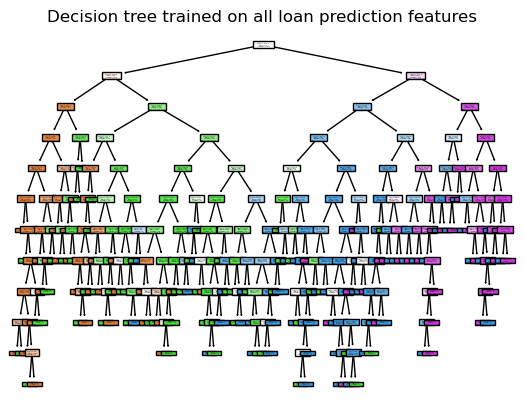

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure()
clf = DecisionTreeClassifier().fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all loan prediction features")
plt.show()

***The depth is too high so it become more complex and it become overfit. So reduce the depth.***

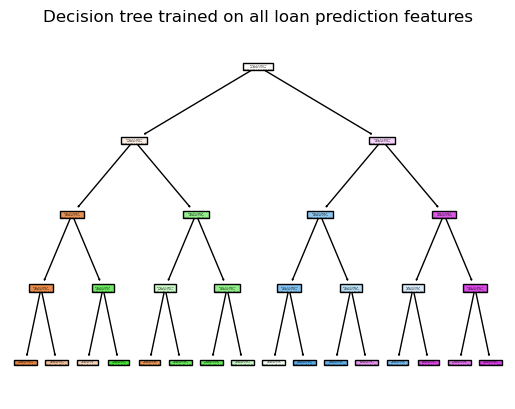

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure()
clf = DecisionTreeClassifier(max_depth = 4).fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all loan prediction features")
plt.show()